In [2]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

In [16]:
DATA_PATH = "./"
ITERATIONS = ["_1","_2","_3","_4","_5"]

#Device Arrays as needed for plotting

#All Devices
DEVICES_ALL = ["6312kw", "adns5700", "apple1152","arduino", "bt58", "diamondback", "dragonrise_black", "dragonrise_green", "dualshock3_wired", "dualshock4_wired", "dualshock4_wireless",
           "exxter", "g15", "g300", "g5", "g700_wired", "g700_wireless", "gembird", "intelli_new", "intelli_og", "k120", "logilink0043", "nixdorf", "nvidiashield", "nvidiashield_wireless", "px1800", "rapoo", "rival", "roccat", "rx250", "sigma", "sk9620", "sunplus", "tramani_wired", "trust_oni_wireless", "unicomp", "wingman", "xbox360_wired", "xbox360_wireless", "xboxone_wireless"]

#Only Mice
DEVICES_MICE = ["bt58","rival","intelli_new","intelli_og","apple1152","sunplus","g5","g300","rapoo",
           "trust_oni_wireless", "adns5700","logilink0043","diamondback","rx250","g700"]

#Only Keyboards
DEVICES_KEYBOARDS = ["k120", "6312kw","nixdorf","sigma","exxter","px1800","gembird","g15","sk9620","roccat","unicomp"]

#Only Gamepads excluding arduino
DEVICES_GAMEPADS = ["dragonrise_green","wingman","dragonrise_black","xboxone_wireless","dualshock4_wired",
           "xbox360_wireless","tramani_wired","dualshock3_wired","xbox360_wired","nvidiashield", "nvidiashield_wireless"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRED = ["dragonrise_green","wingman","dragonrise_black","dualshock4_wired",
                          "tramani_wired","dualshock3_wired","xbox360_wired","nvidiashield"]


#Devices with odd Data
#DEVICES = ["diamondback", "exxter", "arduino"]


#TODO xbox360_wired polling rate
POLLING_RATES = {"6312kw" : -1, "adns5700" : 10, "apple1152" : 10, "arduino" : 1, 
                 "bt58" : 10, "diamondback" : 10, "dragonrise_black" : 10, "dragonrise_green" : 10, 
                 "dualshock3_wired" : 1, "dualshock4_wired" : 5, "dualshock4_wireless" : -1, "exxter" : 10, 
                 "g15" : 24, "g300" : 1, "g5" : 10, "g700_wired" : 1, "g700_wireless" : -1, "gembird" : 10, 
                 "intelli_new" : 1, "intelli_og" : -1, "k120" : 10, "logilink0043" : 10, "nixdorf" : -1, 
                 "nvidiashield" : 1, "nvidiashield_wireless" : -1, "px1800" : 10, "rapoo" : -1, "rival" : 1, 
                 "roccat" : 1, "rx250" : 10, "sigma" : 10, "sk9620" : -1, "sunplus" : 10, 
                 "tramani_wired" : 10, "trust_oni_wireless" : 10, "unicomp" : 10, "wingman" : 10, 
                 "xbox360_wired" : -1, "xbox360_wireless" : -1, "xboxone_wireless" : -1}

DEVICE_NAMES ={"6312kw" : "Acer 6312-KW", "adns5700" : "Microsoft Optical Mouse 200", "apple1152" : "Apple A1152",
               "arduino" : "Arduino Micro","bt58" : "Logitech Premium Optical Wheel Mouse",
               "diamondback" : "Razord Diamondback","dragonrise_black" : "Speedlink Strike (Black)",
               "dragonrise_green" : "Speedlink Strike (Green)", "dualshock3_wired" : "Sony Dualshock 3",
               "dualshock4_wired" : "Sony Dualshock 4 (wired)", "dualshock4_wireless" : "Sony Dualshock 4 (wireless)",
               "exxter" : "Exxter KE-200", "g15" : "Logitech G15", "g300" : "Logitech G300", "g5" : "Logitech G5",
               "g700_wired" : "Logitech G700", "g700_wireless" : "Logitech G700", "gembird" : "Gembird", 
               "intelli_new" : "Microsoft Intellimouse", "intelli_og" : "Microsoft Classic Intellimouse", 
               "k120" : "Logitech K120", "logilink0043" : "LogiLink ID0043", "nixdorf" : "Siemens Nixdorf", 
               "nvidiashield" : "nVidia Shield", "nvidiashield_wireless" : "nVidia Shield", "px1800" : "PX-1800",
               "rapoo" : "Rapoo 6010B", "rival" : "Steel Series Rival Optical Mouse", "roccat" : "Roccat ISKU FX",
               "rx250" : "Logitech RX250", "sigma" : "Sigma", "sk9620" : "Acer SK-9620", "sunplus" : "MS-TECH Laser Game Mouse",
               "tramani_wired" : "Tramani CT-P3000", "trust_oni_wireless" : "Trust Oni Wireless Micro Mouse",
               "unicomp" : "Unicomp Keyboard", "wingman" : "Logitech Wingman", "xbox360_wired" : "XBox 360 wired",
               "xbox360_wireless" : "XBox 360 (wireless)", "xboxone_wireless" : "XBox One Controller"}

MODES = ["default_polling", "1ms_polling"]

all_raw_data = []

#print(os.system("ls"))
DEVICES = DEVICES_KEYBOARDS
for device in DEVICES:
    for mode in MODES:
        for iteration in ITERATIONS:
            if mode == "default_polling":
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_0ms" + iteration +".csv"
                try:
                    #print(path)
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                
                #label = POLLING_RATES[device]
                #if(label == -1):
                #    label = "unknown"
                #label = "default {}ms".format(label)
                
                currentFile["polling"] = "default"
                currentFile["pollingRate"] = POLLING_RATES[device]
            else:
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_1ms" + iteration +".csv"
                try:
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                #currentFile["polling"] = "forced 1ms"
                currentFile["polling"] = "forced"
                currentFile["pollingRate"] = 1
            #print(type(currentFile))
            #print(len(currentFile))
            #print(currentFile)
            
            # vllt später
            #if(currentFile["pollingRate"] == -1):
            #    currentFile["pollingRate"] = "unknown"
            
            all_raw_data.append(currentFile)
all_data = pd.concat(all_raw_data)
#all_data["latency (ms)"] = all_data["latency (s)"] * 1000.0

In [4]:
#sorted(list(all_data["latency"]))[-10:]

In [5]:
all_data

,counter,latency,delayTime,device,polling
0,0,23551,8065,k120,default 10ms
1,1,19633,4222,k120,default 10ms
2,2,16895,7003,k120,default 10ms
3,3,24248,7642,k120,default 10ms
4,4,22995,910,k120,default 10ms
5,5,22357,1513,k120,default 10ms
6,6,16169,7777,k120,default 10ms
7,7,25007,6949,k120,default 10ms
8,8,21795,1990,k120,default 10ms
9,9,23392,505,k120,default 10ms


k120
6312kw
nixdorf
sigma
exxter
px1800
gembird
g15
sk9620
roccat
unicomp


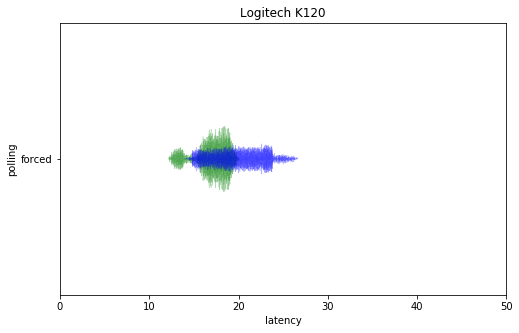

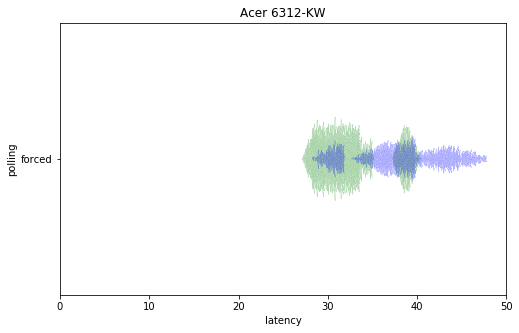

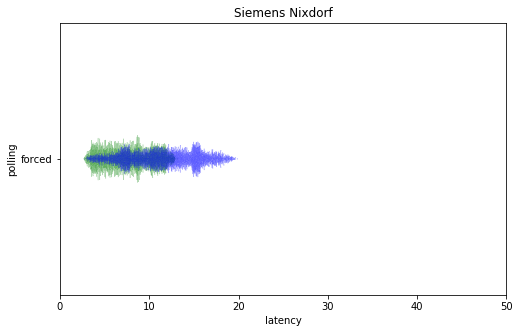

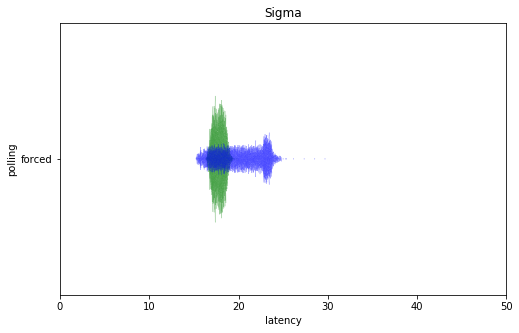

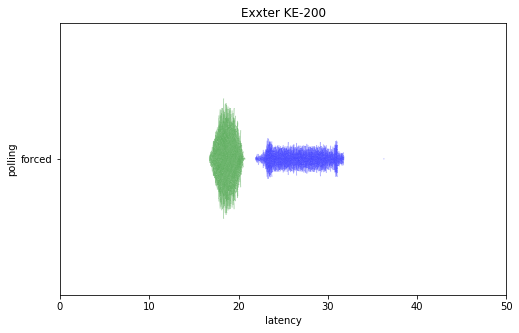

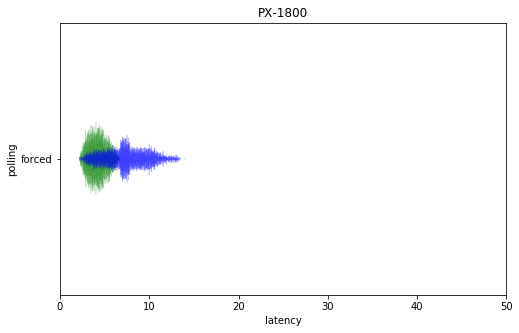

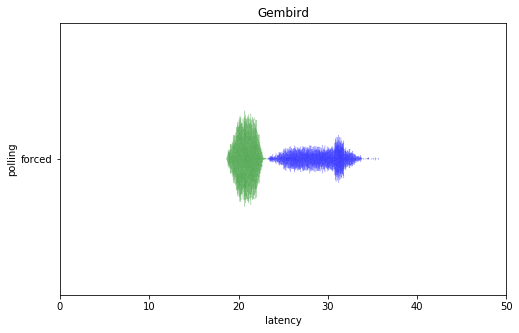

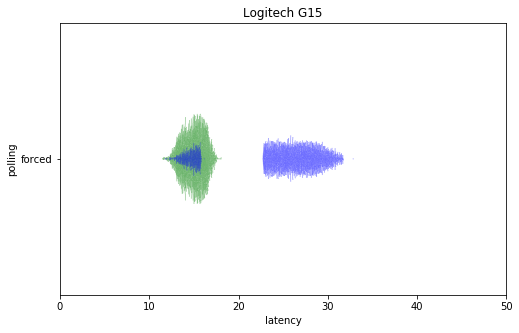

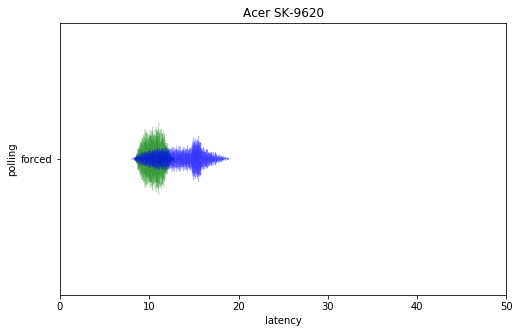

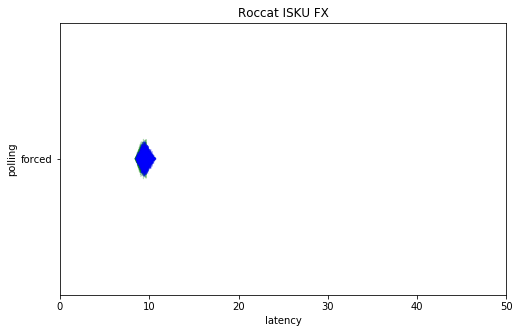

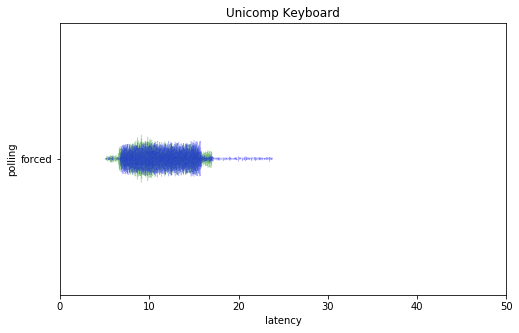

In [21]:
i = 0

import os
MAX_LATENCY = 100000 # microseconds



for device in DEVICES:
    
    fig, axes = plt.subplots(1, 1)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    
    #values_default = all_data[(all_data["device"] == DEVICES[i]) & ("default" in all_data["polling"])]
    values = all_data[((all_data["device"]) == DEVICES[i])]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i]) & (all_data["polling"] != "default_polling")]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i])]
   
    
    
    values_default = values[values["latency"]<=MAX_LATENCY]
    values_default = values_default[values_default["polling"] == "default"]
    
    values_forced = values[values["latency"]<=MAX_LATENCY]
    values_forced = values_forced[values_forced["polling"] == "forced"]
    #values_default = values_default[values_default["polling"]("default")]
    #values_forced = values_forced[(values_forced["latency"]<=MAX_LATENCY) & ("default" not in values_forced["polling"])] 
    
    #print(values_default)
    
    plt.title(DEVICE_NAMES[device])
    swarmi_default = sns.swarmplot((values_default["latency"]/1000), values_default["polling"], color="b", size=1, dodge=True, marker="H",orient="h", alpha=0.5, zorder=1)
    swarmi_forced = sns.swarmplot((values_forced["latency"]/1000), values_forced["polling"], color="g", size=1, dodge=True, marker="H",orient="h", alpha=0.5, zorder=0)
    swarmi_forced.set_xlim(0, 50)
    swarmi_default.set_xlim(0, 50)
       
    
    i = i+1
    print(device)
    #plt.savefig("png/{}.png".format(device), dpi=600)
    
    # automatically print it - use carefully!
    #os.system("lp png/{}.png".format(device))
    
    #plt.close(fig)
    
    


#plt.savefig("svg/allDevices.svg")
#plt.savefig("png/allDevices.png")

In [21]:
print(len(DEVICES))

2


In [ ]:
values = all_data[(all_data["device"]) == "diamondback"]

plt.title(device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2, ax =axes)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

In [55]:
#Plotting a single swarmplot

plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()
sns.swarmplot(data=all_data, y="device", x="latency", hue=None, palette="Set2", size=1,orient="h", alpha=1, ax=axes[i],)

plt.xlabel("latency (ms)")
plt.xlim(0, 100)



KeyboardInterrupt: 

KeyboardInterrupt: 

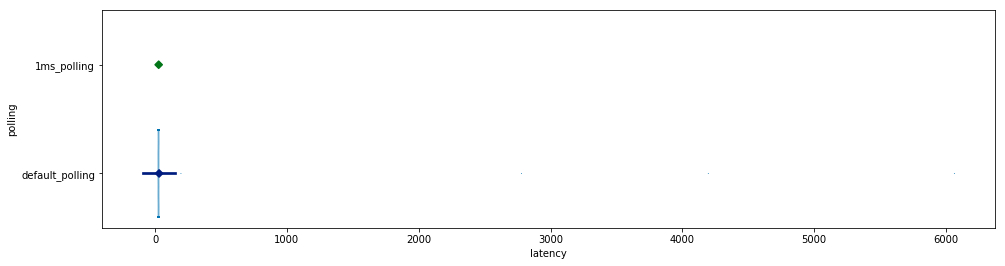

In [56]:
values = all_data[(all_data["device"] == "exxter")]


plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

plt.xlabel("latency (ms)")
plt.xlim(0, 100)

axes = plt.gca()
#axes.set_xlim(0,100)

In [ ]:
#Plotting all devices in one picture
i = 0

#plt.xlim(0, 80)
fig, axes = plt.subplots((len(DEVICES)), 1)


fig.set_figheight(4 * len(DEVICES))
fig.set_figwidth(16)

#fig(xlim = [0,80])


#axes.set_xlabel("latency (ms)")
#axes = plt.gca()
#axes.set_xlim([0,80])



for device in DEVICES:
    values = all_data[(all_data["device"]) == DEVICES[i]]

    plt.title('Swarmplot of '+ device)
    #sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set2",size=1,orient="h",alpha=1, ax=axes[i])    
    
    #point_plot = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, ax=axes[i], capsize=.2)
    swarm_plot = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, edgecolors='w', ax=axes[i])

    POLLING_RATES[device]
    
    axes[i].set_xlim(0, 40)
    i = i+1
    print(device)


plt.savefig("svg/allDevices.svg")
plt.savefig("png/allDevices.png")

(0, 100)

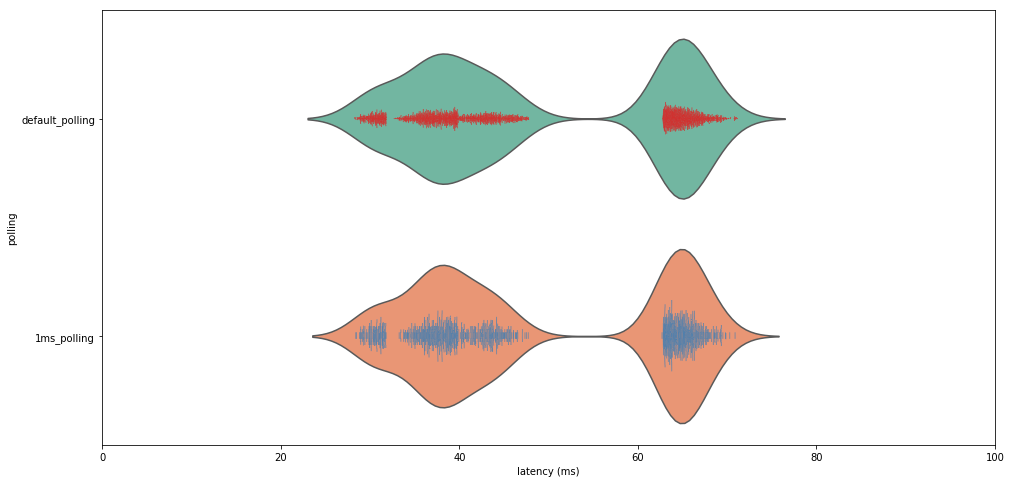

In [83]:
#Plotting a single swarmplot
values = all_data[(all_data["device"] == "6312kw")]

plt.figure(figsize=[16, 8])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()

ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set1", size=1,marker ="H", orient="h", alpha=1)
ax = sns.violinplot((values["latency"]/1000), values["polling"], inner=None, palette="Set2", split=True )
plt.xlabel("latency (ms)")
plt.xlim(0, 100)

#axes = plt.gca()
#axes.set_xlim(0,100)

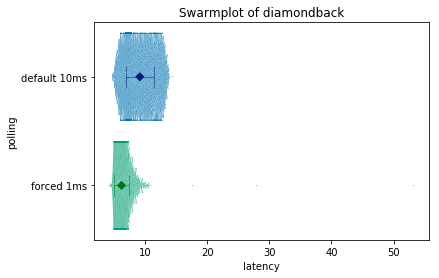

In [17]:
MAX_LATENCY = 100000 # microseconds
values = all_data[(all_data["device"]) == "diamondback"]
values = values[values["latency"]<=MAX_LATENCY]
plt.title('Swarmplot of '+ device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

#plt.savefig("svg/test1.svg")
#plt.savefig("png/test1.png")